## 1. Understand the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [4]:
df.parse_dates=['Created Date', 'Closed Date']

#### a. Identify the shape of the dataset

In [5]:
df.head

<bound method NDFrame.head of        Unique Key            Created Date             Closed Date Agency  \
0        32310363  12/31/2015 11:59:45 PM  01/01/2016 12:55:15 AM   NYPD   
1        32309934  12/31/2015 11:59:44 PM  01/01/2016 01:26:57 AM   NYPD   
2        32309159  12/31/2015 11:59:29 PM  01/01/2016 04:51:03 AM   NYPD   
3        32305098  12/31/2015 11:57:46 PM  01/01/2016 07:43:13 AM   NYPD   
4        32306529  12/31/2015 11:56:58 PM  01/01/2016 03:24:42 AM   NYPD   
...           ...                     ...                     ...    ...   
51921    31942282  11/09/2015 12:41:27 PM  11/09/2015 01:46:10 PM   NYPD   
51922    31944080  11/09/2015 12:40:21 PM  11/09/2015 02:38:09 PM   NYPD   
51923    31947566  11/09/2015 12:39:54 PM  11/10/2015 02:45:27 AM   NYPD   
51924    31941771  11/09/2015 12:38:19 PM  11/09/2015 02:21:38 PM   NYPD   
51925    31941828  11/09/2015 12:35:22 PM  11/09/2015 02:34:34 PM   NYPD   

                           Agency Name           Complain

In [6]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [7]:
df.shape

(51926, 53)

In [8]:
type(df)

pandas.core.frame.DataFrame

#### b. Identify variables with null values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51926 entries, 0 to 51925
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      51926 non-null  int64  
 1   Created Date                    51926 non-null  object 
 2   Closed Date                     51645 non-null  object 
 3   Agency                          51926 non-null  object 
 4   Agency Name                     51926 non-null  object 
 5   Complaint Type                  51926 non-null  object 
 6   Descriptor                      51168 non-null  object 
 7   Location Type                   51926 non-null  object 
 8   Incident Zip                    51597 non-null  float64
 9   Incident Address                45890 non-null  object 
 10  Street Name                     45890 non-null  object 
 11  Cross Street 1                  45117 non-null  object 
 12  Cross Street 2                  

In [10]:
df.isna().sum()

Unique Key                            0
Created Date                          0
Closed Date                         281
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                          758
Location Type                         0
Incident Zip                        329
Incident Address                   6036
Street Name                        6036
Cross Street 1                     6809
Cross Street 2                     6866
Intersection Street 1             45945
Intersection Street 2             46006
Address Type                        375
City                                330
Landmark                          51900
Facility Type                       276
Status                                0
Due Date                              0
Resolution Description                1
Resolution Action Updated Date      277
Community Board                       1
Borough                               1


In [11]:
df_nulls = pd.DataFrame(df.isna().sum())

In [12]:
df_nulls = df_nulls[df_nulls[0] !=0]

In [13]:
df_nulls.columns =['nulls']

In [14]:
df_nulls

,nulls
Closed Date,281
Descriptor,758
Incident Zip,329
Incident Address,6036
Street Name,6036
Cross Street 1,6809
Cross Street 2,6866
Intersection Street 1,45945
Intersection Street 2,46006
Address Type,375


## 2. Perform basic data exploratory analysis:

#### a. Utilize missing value treatment

In [15]:
df.columns= df.columns.str.replace(" ", "_")

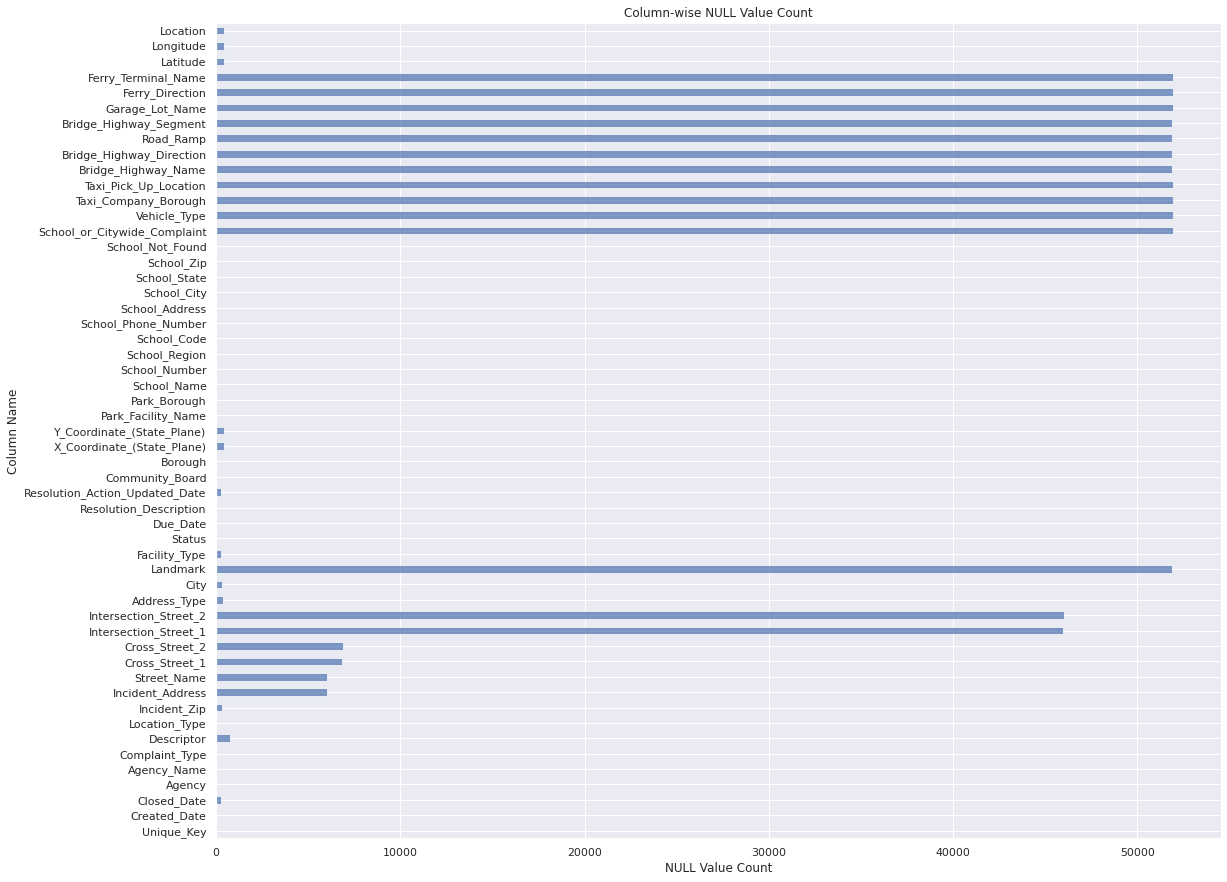

In [16]:
sns.set()
df.isnull().sum().plot(kind='barh', alpha= 0.7, figsize= (18,15), title="Column-wise NULL Value Count")
plt.xlabel('NULL Value Count')
plt.ylabel('Column Name')
plt.show()

In [17]:
df[['Closed_Date', 'Created_Date']].isnull().sum()

Closed_Date     281
Created_Date      0
dtype: int64

In [18]:
df = df[pd.notnull(df['Closed_Date'])]

In [19]:
df.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date',
       'Community_Board', 'Borough', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'School_or_Citywide_Complaint',
       'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location',
       'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp',
       'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_

#### b. Analyze the date column and remove the entries if it has an incorrect timeline

In [20]:
df['Created_Date'] = pd.to_datetime(df['Created_Date'])
df['Closed_Date'] = pd.to_datetime(df['Closed_Date'])
df['Due_Date'] = pd.to_datetime(df['Due_Date'])
df['Resolution_Action_Updated_Date'] = pd.to_datetime(df['Resolution_Action_Updated_Date'])
df.dtypes

Unique_Key                                 int64
Created_Date                      datetime64[ns]
Closed_Date                       datetime64[ns]
Agency                                    object
Agency_Name                               object
Complaint_Type                            object
Descriptor                                object
Location_Type                             object
Incident_Zip                             float64
Incident_Address                          object
Street_Name                               object
Cross_Street_1                            object
Cross_Street_2                            object
Intersection_Street_1                     object
Intersection_Street_2                     object
Address_Type                              object
City                                      object
Landmark                                  object
Facility_Type                             object
Status                                    object
Due_Date            

In [21]:
df.Created_Date[0]

Timestamp('2015-12-31 23:59:45')

In [22]:
df.Closed_Date[0]

Timestamp('2016-01-01 00:55:15')

In [23]:
df['Created_Date'].isna().sum()

0

In [24]:
df['Request_Closing_Time']=  df["Closed_Date"] - df["Created_Date"]

In [25]:
df["Request_Closing_Time"]

0       0 days 00:55:30
1       0 days 01:27:13
2       0 days 04:51:34
3       0 days 07:45:27
4       0 days 03:27:44
              ...      
51921   0 days 01:04:43
51922   0 days 01:57:48
51923   0 days 14:05:33
51924   0 days 01:43:19
51925   0 days 01:59:12
Name: Request_Closing_Time, Length: 51645, dtype: timedelta64[ns]

In [26]:
df['Request_Closing_Time']=df['Request_Closing_Time']/np.timedelta64(1,'s')

In [27]:
df['Request_Closing_Time']

0         3330.0
1         5233.0
2        17494.0
3        27927.0
4        12464.0
          ...   
51921     3883.0
51922     7068.0
51923    50733.0
51924     6199.0
51925     7152.0
Name: Request_Closing_Time, Length: 51645, dtype: float64

In [28]:
df.describe()

,Unique_Key,Incident_Zip,X_Coordinate_(State_Plane),Y_Coordinate_(State_Plane),School_or_Citywide_Complaint,Vehicle_Type,Taxi_Company_Borough,Taxi_Pick_Up_Location,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Request_Closing_Time
count,5.164500e+04,51583.000000,5.147000e+04,51470.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51470.000000,51470.000000,5.164500e+04
mean,3.213222e+07,10880.670434,1.004374e+06,201351.797979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.719289,-73.927363,1.700067e+04
std,1.043719e+05,571.101388,2.242784e+04,29378.828880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080633,0.080887,2.949427e+04
min,3.194171e+07,83.000000,9.133570e+05,121998.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.501279,-74.254937,1.460000e+02
25%,3.204134e+07,10451.500000,9.904570e+05,180214.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661270,-73.977602,4.695000e+03
50%,3.213742e+07,11211.000000,1.002764e+06,199511.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714284,-73.933227,9.954000e+03
75%,3.222175e+07,11249.000000,1.019523e+06,218498.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.766331,-73.872718,1.974300e+04
max,3.231065e+07,11697.000000,1.067154e+06,271391.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.911533,-73.700837,2.078466e+06


#### c. Draw a frequency plot for city-wise complaints

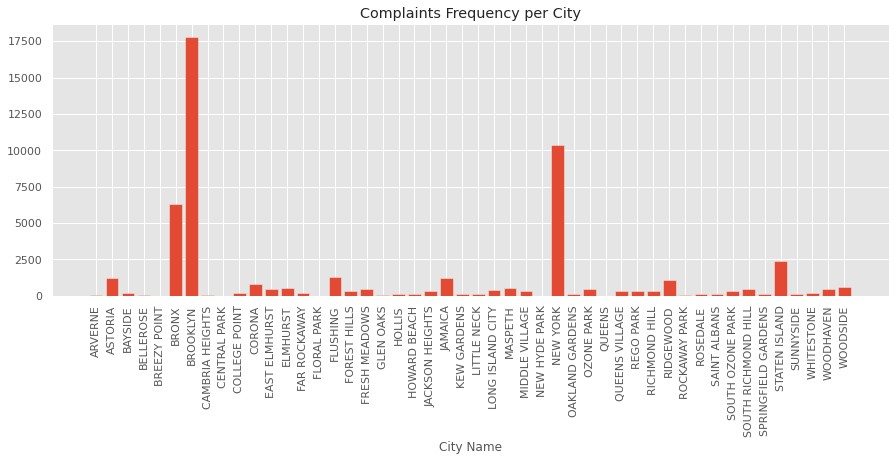

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
df_freq = df.groupby('City')['City'].count()
style.use('ggplot')
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlabel('City Name')
plt.title('Complaints Frequency per City')
plt.bar(df_freq.index, df_freq)
plt.show()


#### d. Draw scatter and hexbin plots for complaint concentration across Brooklyn

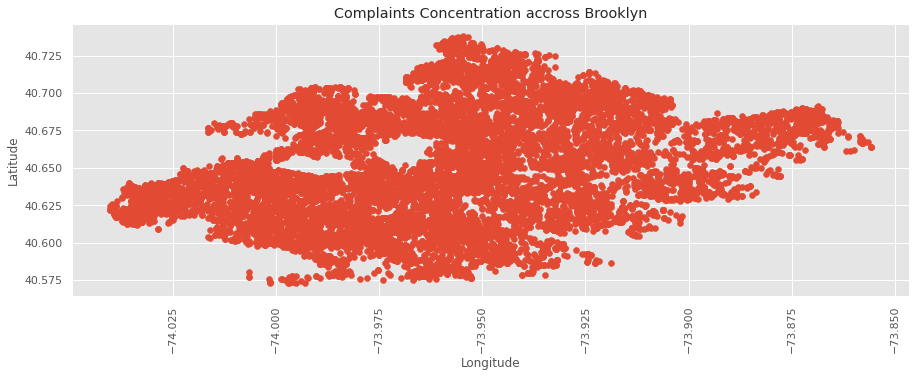

In [30]:
df1 = df[df.City == 'BROOKLYN']
style.use('ggplot')
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Complaints Concentration accross Brooklyn')
plt.scatter(df1['Longitude'], df1['Latitude'])
plt.show()

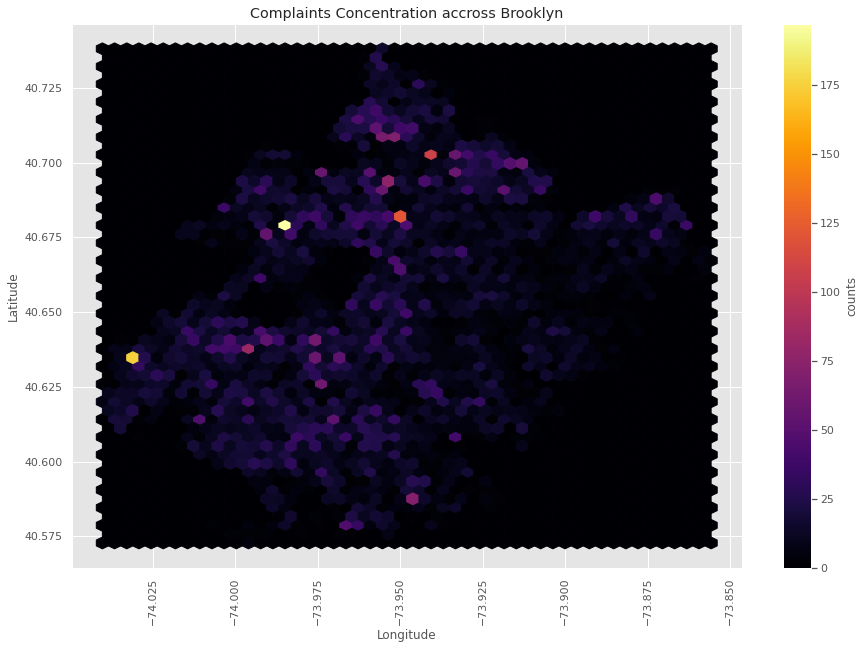

In [31]:
df1 = df[df.City == 'BROOKLYN']
style.use('ggplot')
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Complaints Concentration accross Brooklyn')
hp = plt.hexbin(df1['Longitude'], df1['Latitude'], gridsize=50, cmap='inferno')
plt.colorbar(hp, label='counts')
plt.show()


## 3. Find major types of complaints:

#### a. Plot a bar graph of count vs. complaint types

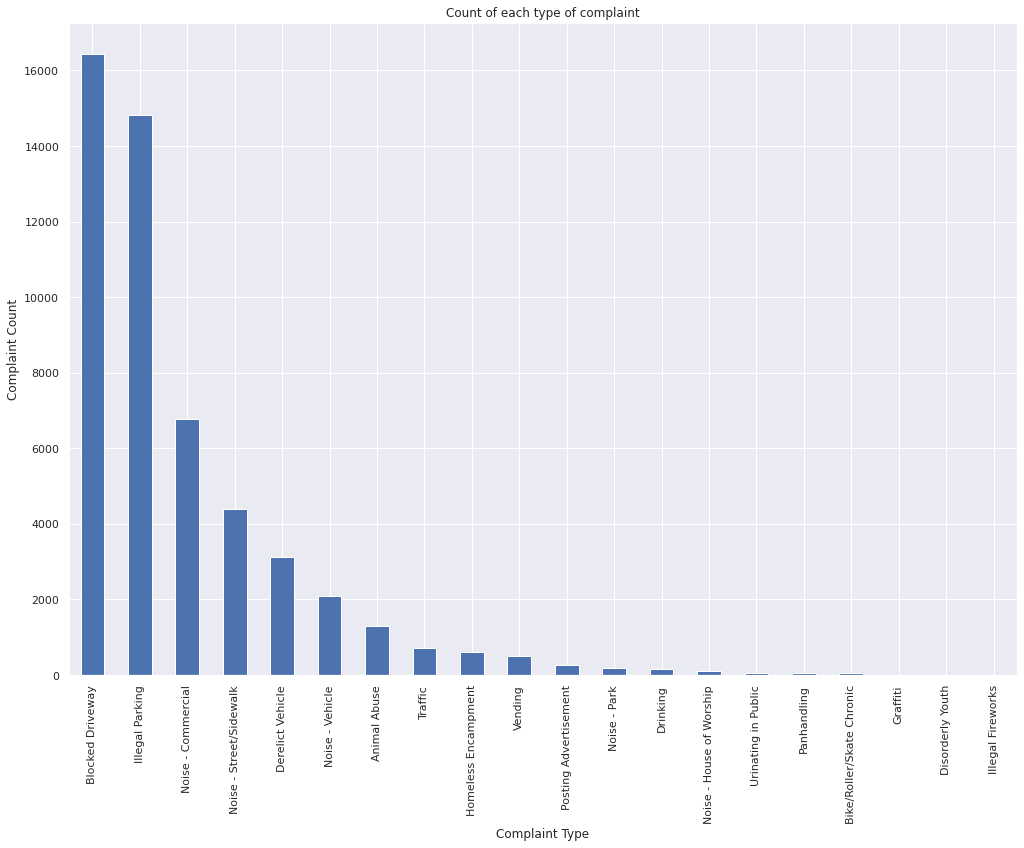

In [32]:
sns.set()
df['Complaint_Type'].value_counts().plot(kind= 'bar', figsize=(17,12), title="Count of each type of complaint")
plt.xlabel('Complaint Type')
plt.ylabel('Complaint Count')
plt.show()

In [33]:
df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS'],
      dtype=object)

In [34]:
df.loc[df['City']== 'NEW YORK']['Complaint_Type'].value_counts()

Noise - Commercial           3085
Illegal Parking              2263
Noise - Street/Sidewalk      2075
Noise - Vehicle               891
Homeless Encampment           401
Blocked Driveway              399
Vending                       307
Traffic                       299
Animal Abuse                  283
Derelict Vehicle              127
Noise - Park                   86
Drinking                       36
Panhandling                    33
Urinating in Public            21
Noise - House of Worship       19
Bike/Roller/Skate Chronic      18
Posting Advertisement           9
Graffiti                        4
Disorderly Youth                2
Name: Complaint_Type, dtype: int64

#### b. Find the top 10 types of complaints

In [35]:
df['Complaint_Type'].value_counts()[0:10]

Blocked Driveway           16442
Illegal Parking            14810
Noise - Commercial          6764
Noise - Street/Sidewalk     4388
Derelict Vehicle            3118
Noise - Vehicle             2096
Animal Abuse                1285
Traffic                      726
Homeless Encampment          601
Vending                      512
Name: Complaint_Type, dtype: int64

In [36]:
top10_complaints= np.array(df['Complaint_Type'].value_counts()[0:10].index)

#### c. Display the types of complaints in each city in a separate dataset

In [37]:
df_new= pd.DataFrame()

In [38]:
for i in df['City'].unique():
    df_new[i]= df.loc[df['City']== i]['Complaint_Type'].value_counts()

In [39]:
df_new.head()

,NEW YORK,ASTORIA,BRONX,ELMHURST,BROOKLYN,KEW GARDENS,JACKSON HEIGHTS,MIDDLE VILLAGE,REGO PARK,SAINT ALBANS,...,CAMBRIA HEIGHTS,ROSEDALE,SUNNYSIDE,WHITESTONE,ARVERNE,FLORAL PARK,NEW HYDE PARK,CENTRAL PARK,BREEZY POINT,QUEENS
Noise - Commercial,3085,186.0,511,18.0,2117,29.0,84.0,2.0,25.0,6.0,...,4.0,1.0,15.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
Illegal Parking,2263,262.0,1528,147.0,5696,32.0,36.0,185.0,132.0,46.0,...,14.0,43.0,25.0,92.0,15.0,8.0,2.0,NaN,NaN,1.0
Noise - Street/Sidewalk,2075,49.0,599,14.0,1194,2.0,15.0,5.0,10.0,8.0,...,2.0,2.0,10.0,6.0,2.0,NaN,NaN,15.0,1.0,NaN
Noise - Vehicle,891,22.0,207,4.0,648,2.0,5.0,14.0,10.0,3.0,...,10.0,1.0,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
Homeless Encampment,401,5.0,27,13.0,107,NaN,1.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


## 4. Visualize the major types of complaints in each city

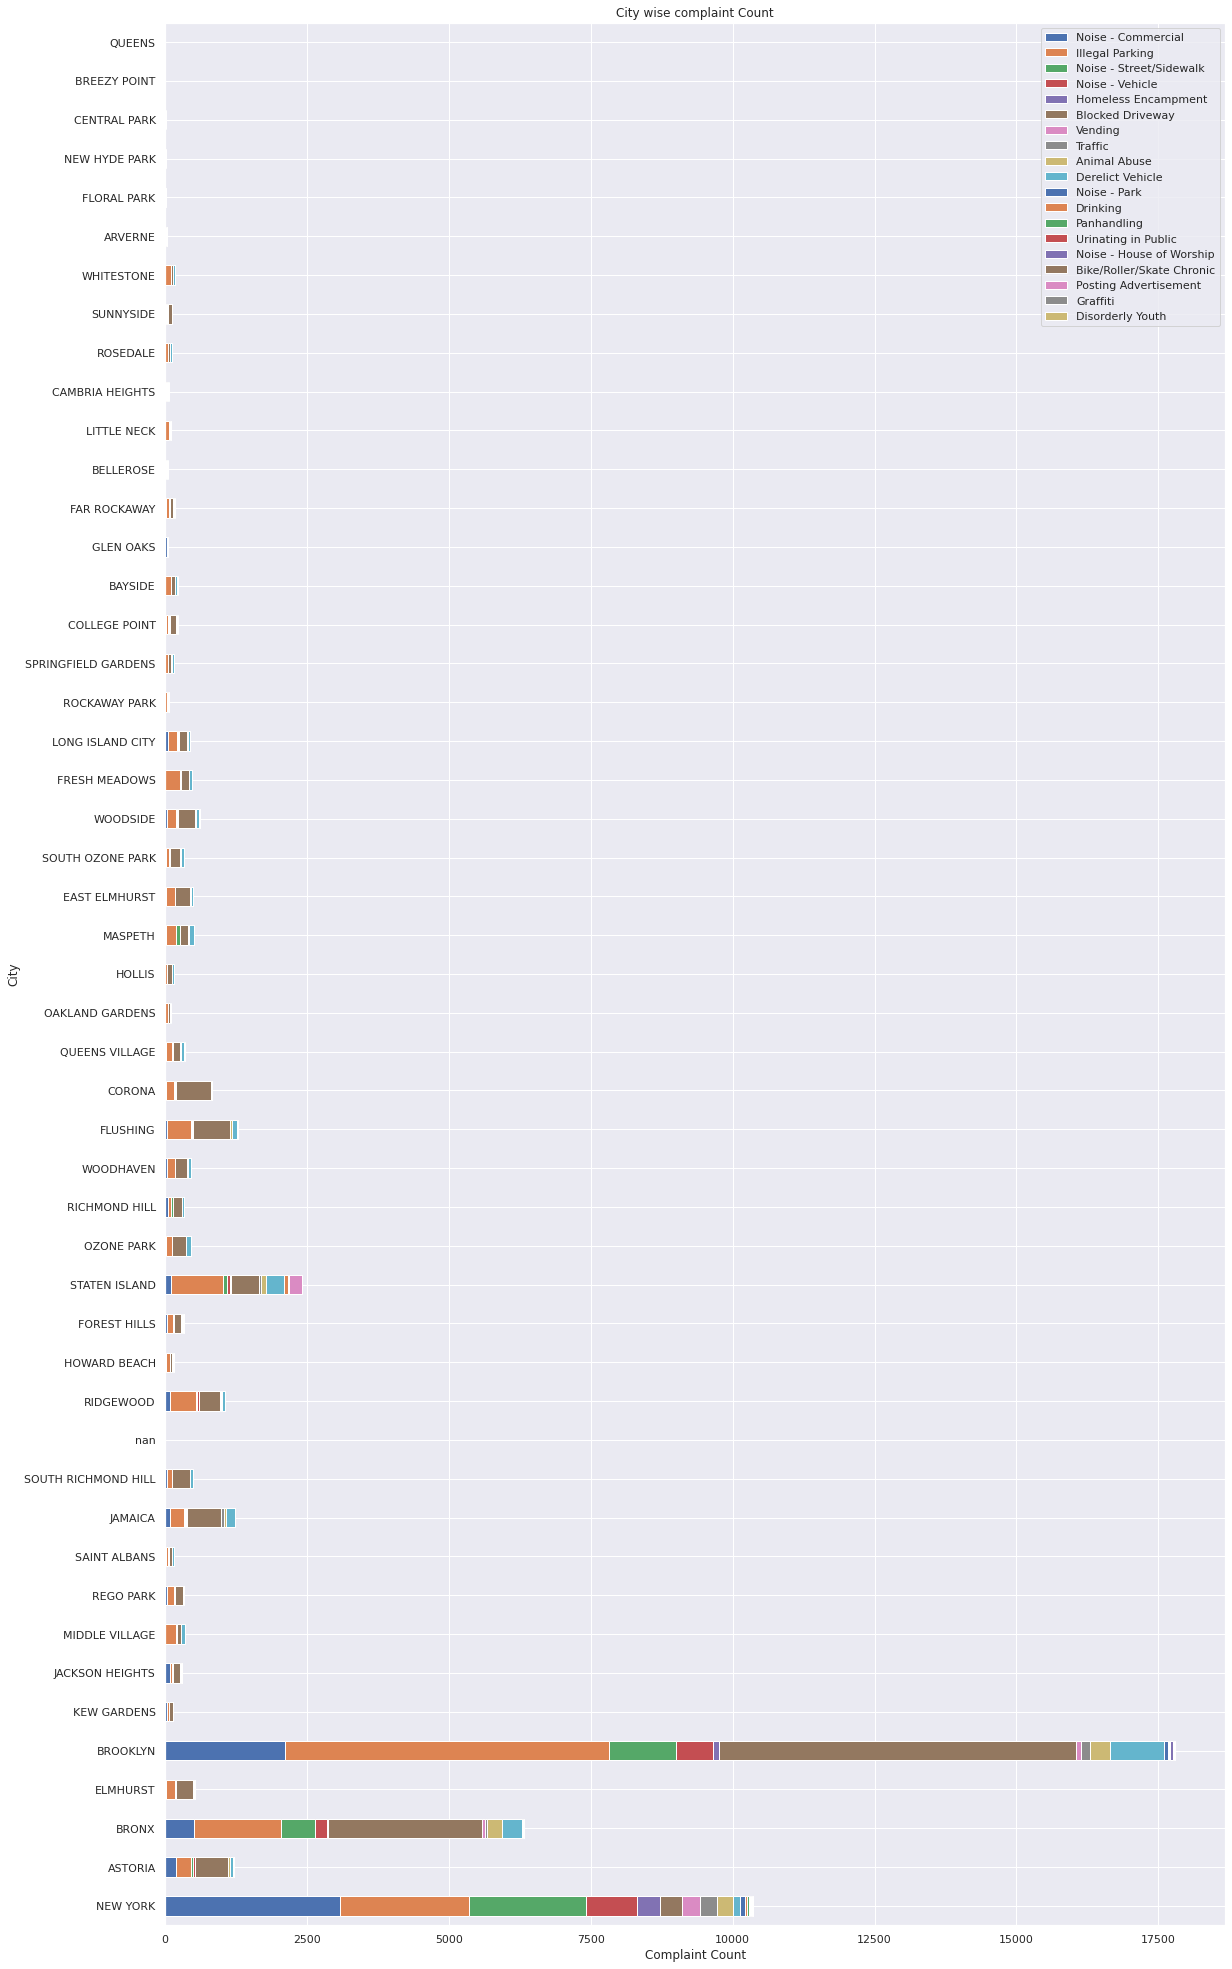

In [40]:
sns.set()
df_new.T.plot(kind='barh', stacked=True, figsize=(19, 35), title= "City wise complaint Count")
plt.xlabel('Complaint Count')
plt.ylabel('City')
plt.show()

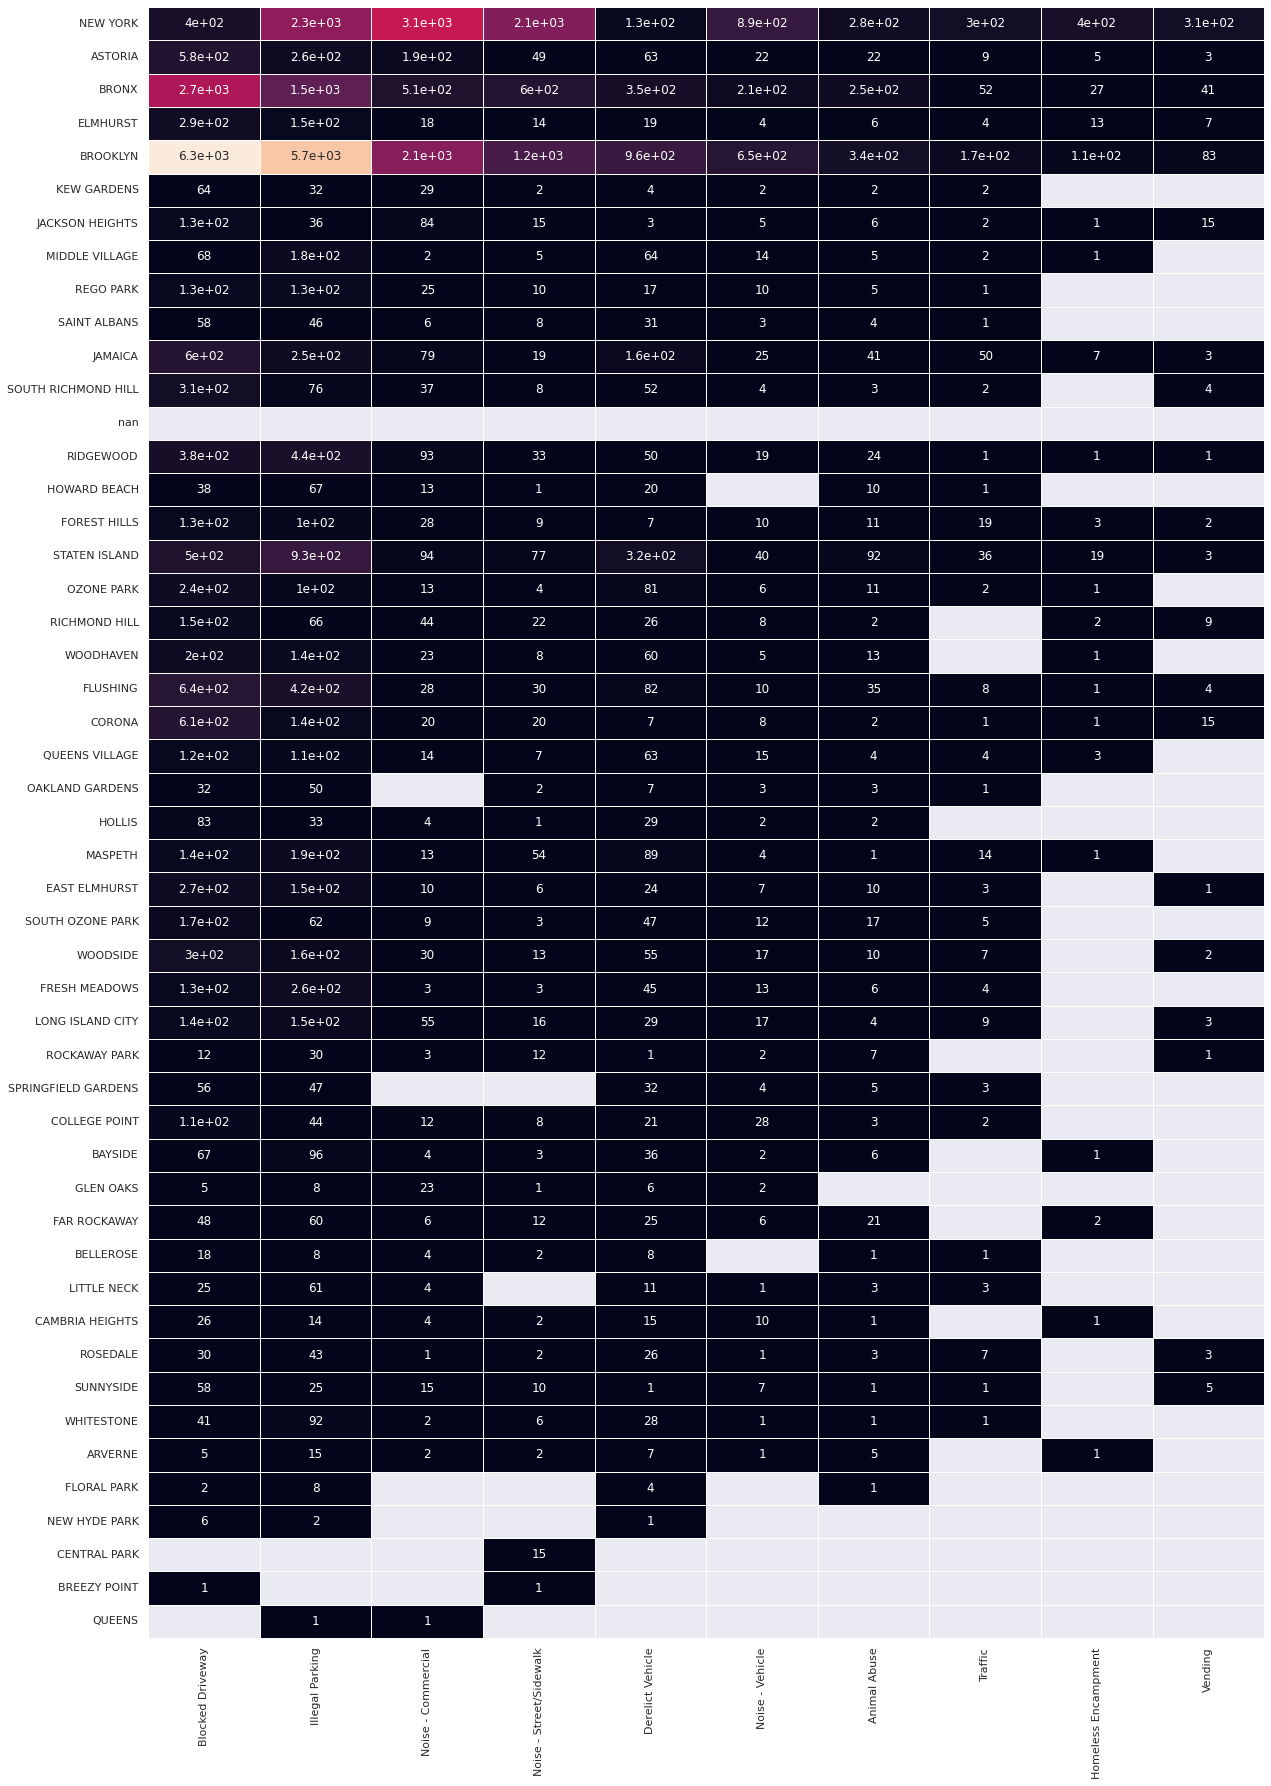

In [41]:
df_new_T= df_new.T
sns.set()
f, ax = plt.subplots(figsize=(20, 30))
sns.heatmap(df_new_T[top10_complaints], annot=True, cbar=False, linewidths=.8, ax=ax)
plt.show()

In [42]:
df.groupby(['City', 'Complaint_Type'], sort= True).Request_Closing_Time.mean()

City      Complaint_Type         
ARVERNE   Animal Abuse                8452.800000
          Blocked Driveway            7065.000000
          Derelict Vehicle           13362.714286
          Homeless Encampment         7429.000000
          Illegal Parking             8401.000000
                                         ...     
WOODSIDE  Noise - Street/Sidewalk    18521.000000
          Noise - Vehicle            16494.529412
          Traffic                    16681.285714
          Urinating in Public        32717.000000
          Vending                     9459.000000
Name: Request_Closing_Time, Length: 487, dtype: float64

## 5. Check if the average response time across various types of complaints

In [43]:
df.groupby(['Complaint_Type'], sort= True).Request_Closing_Time.mean()

Complaint_Type
Animal Abuse                 21492.271595
Bike/Roller/Skate Chronic    11330.934783
Blocked Driveway             18799.319791
Derelict Vehicle             27879.774856
Disorderly Youth             10375.181818
Drinking                     17967.124260
Graffiti                     23232.500000
Homeless Encampment          15181.149750
Illegal Fireworks            16701.333333
Illegal Parking              16965.987643
Noise - Commercial           11712.187167
Noise - House of Worship     10456.400000
Noise - Park                 13593.778351
Noise - Street/Sidewalk      13257.551276
Noise - Vehicle              13470.007634
Panhandling                  23079.750000
Posting Advertisement         4326.064151
Traffic                      13980.110193
Urinating in Public          13379.925926
Vending                      14529.890625
Name: Request_Closing_Time, dtype: float64

In [44]:
df.Request_Closing_Time.mean()

17000.66635685933

In [45]:
df.Request_Closing_Time.describe()

count    5.164500e+04
mean     1.700067e+04
std      2.949427e+04
min      1.460000e+02
25%      4.695000e+03
50%      9.954000e+03
75%      1.974300e+04
max      2.078466e+06
Name: Request_Closing_Time, dtype: float64

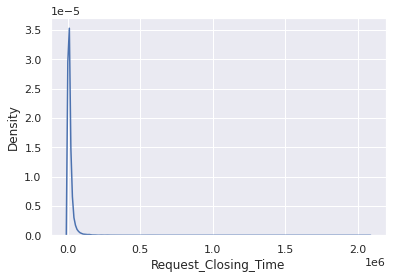

In [46]:
sns.set()
sns.distplot(df.Request_Closing_Time, hist= False)
plt.show()

## 6. Identify significant variables by performing a statistical analysis using p-values and chi-square values 

#### a. Using P-Value

In [47]:
#Check for nomality of Age
# Shapiro- Wilk Test
from scipy.stats import shapiro
stat, p= shapiro(df.Request_Closing_Time)
print(stat, p)

0.40205830335617065 0.0


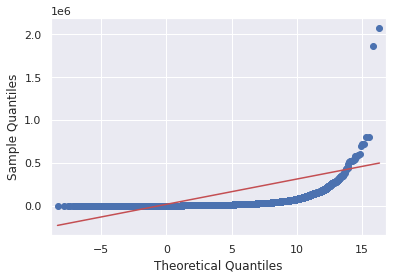

In [48]:
import statsmodels.api as sm
import pylab
sm.qqplot(df.Request_Closing_Time, loc = 4, scale = 3, line='s')
pylab.show()

In [49]:
Complaint_Types= df.Complaint_Type.unique()

In [50]:
len(Complaint_Types)

20

In [51]:
new= []
for i in Complaint_Types:
  new.append(df.loc[df['Complaint_Type']== i]['Request_Closing_Time'].ravel())

In [52]:
new

[array([ 3330.,  8996.,  2856., ..., 42143.,  8929.,  7207.]),
 array([ 5233., 17494.,  6529., ...,  8778.,  8931.,  3883.]),
 array([27927., 12464.,  6821., ...,  7068., 50733.,  7152.]),
 array([37785., 14224.,  4913., ..., 54382., 52870.,  5122.]),
 array([ 3078., 10589.,  4598., ...,  7644.,  2966.,  2678.]),
 array([  1610.,   5962.,   4536.,   3460.,   8747.,   1529.,   1947.,
          1077.,   3634.,   3102.,   5858.,   1503.,   2612.,  21093.,
          4338.,   8901.,  25127.,   5713.,  21690.,  17758.,  11607.,
          4684.,   8352.,   6556.,   6771.,   1638.,   1613.,   7635.,
         16066.,    842.,   9541.,   1837.,   8299.,   1372.,   2115.,
          3740.,  24827.,   1670.,   5834.,  34834.,   6679.,   3915.,
          7301.,  11979.,  14133.,  15121.,  15651.,  27116.,   9585.,
         25104.,  14712.,    396.,   4027.,   4254.,   2493.,    967.,
         16135.,    697.,  34170.,   2624.,   3807.,   7671.,   2002.,
          1028.,   3587.,   2135.,   8914.,  2

In [53]:
from scipy.stats import kruskal
# compare samples
stat, p = kruskal(new[0],new[1], new[2],new[3], new[4], new[5], new[6], new[7], new[8], new[9], new[10], new[11], new[12], new[13], new[14], new[15], new[16], new[17], new[18], new[19])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=1923.797, p=0.000
Different distributions (reject H0)


#### b. Using Chi-Square Values

In [54]:
#contingency Table for complaints
contingency_table = pd.crosstab(df['City'],df['Complaint_Type'], margins= True)
contingency_table.head()

Complaint_Type,Animal Abuse,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Traffic,Urinating in Public,Vending,All
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,5,0,5,7,0,0,0,1,0,15,...,0,0,2,1,0,0,0,1,0,39
ASTORIA,22,7,578,63,0,4,0,5,0,262,...,2,2,49,22,0,0,9,1,3,1215
BAYSIDE,6,0,67,36,0,0,2,1,0,96,...,0,0,3,2,0,0,0,0,0,217
BELLEROSE,1,0,18,8,0,0,0,0,0,8,...,0,0,2,0,0,0,1,0,0,42
BREEZY POINT,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2


In [55]:
contingency_table.shape

(49, 21)

In [56]:
contingency_table.iloc[0:5][0:24].values

array([[   5,    0,    5,    7,    0,    0,    0,    1,    0,   15,    2,
           0,    0,    2,    1,    0,    0,    0,    1,    0,   39],
       [  22,    7,  578,   63,    0,    4,    0,    5,    0,  262,  186,
           2,    2,   49,   22,    0,    0,    9,    1,    3, 1215],
       [   6,    0,   67,   36,    0,    0,    2,    1,    0,   96,    4,
           0,    0,    3,    2,    0,    0,    0,    0,    0,  217],
       [   1,    0,   18,    8,    0,    0,    0,    0,    0,    8,    4,
           0,    0,    2,    0,    0,    0,    1,    0,    0,   42],
       [   0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    0,    0,    0,    0,    0,    0,    2]])

In [57]:
f_obs= []
for i in range(0, contingency_table.shape[0]-1):
    f_obs.append(contingency_table.iloc[i][0:24].values)
f_obs= np.array(f_obs)
f_obs[0:5]

array([[   5,    0,    5,    7,    0,    0,    0,    1,    0,   15,    2,
           0,    0,    2,    1,    0,    0,    0,    1,    0,   39],
       [  22,    7,  578,   63,    0,    4,    0,    5,    0,  262,  186,
           2,    2,   49,   22,    0,    0,    9,    1,    3, 1215],
       [   6,    0,   67,   36,    0,    0,    2,    1,    0,   96,    4,
           0,    0,    3,    2,    0,    0,    0,    0,    0,  217],
       [   1,    0,   18,    8,    0,    0,    0,    0,    0,    8,    4,
           0,    0,    2,    0,    0,    0,    1,    0,    0,   42],
       [   0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    0,    0,    0,    0,    0,    0,    2]])

In [58]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(21422.978727370017, 0.0, 940)

## P-value is approximately zero. So we have evidence against the null hypothesis.